In [2]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Carregar o dataset
dataset_path = 'Dataset_para_Controle_de_Ar_Condicionado.csv'
df = pd.read_csv(dataset_path)

# Visualizar as primeiras linhas do dataset
print("Visualização inicial do dataset:")
print(df.head())

Visualização inicial do dataset:
   Temperatura    Umidade  Status_AC
0    22.494481  55.681266          0
1    29.408572  33.365599          1
2    26.783927  36.465149          1
3    25.183902  65.942168          1
4    19.872224  54.257162          0


In [ ]:
# Remover valores nulos
df.dropna(inplace=True)

# Remover outliers (Exemplo: valores de temperatura e umidade fora do intervalo esperado)
df = df[(df['Temperatura'] >= 0) & (df['Temperatura'] <= 50)]
df = df[(df['Umidade'] >= 0) & (df['Umidade'] <= 100)]

# Conversão de tipos 
print(df.columns)
if 'Status_Ar_Condicionado' in df.columns:
    df['Status_Ar_Condicionado'] = df['Status_Ar_Condicionado'].astype(int)
else:
    print("Column 'Status_Ar_Condicionado' not found. Please check the column name.")


# Normalização das variáveis 'temperatura' and 'umidade'
scaler = MinMaxScaler()
df[['Temperatura', 'Umidade']] = scaler.fit_transform(df[['Temperatura', 'Umidade']])

Index(['Temperatura', 'Umidade', 'Status_AC'], dtype='object')
Column 'Status_Ar_Condicionado' not found. Please check the column name.


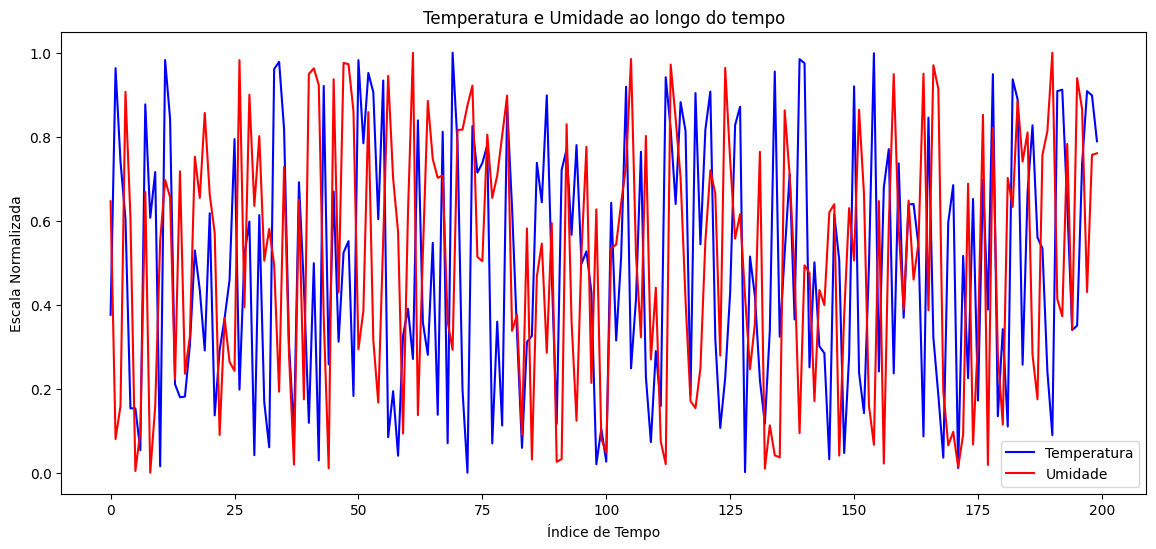

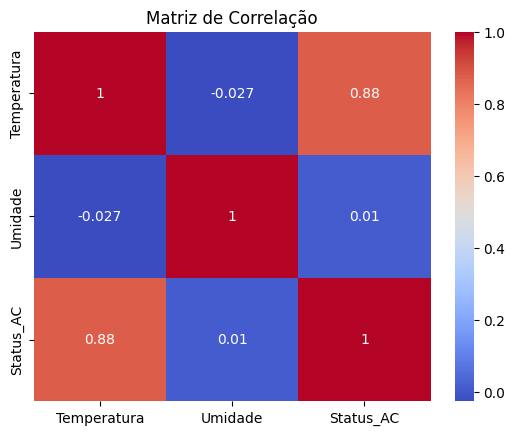

In [ ]:
# Gráfico de temperatura e umidade ao longo do tempo
plt.figure(figsize=(14, 6))
# df = df[(df['Temperatura'] >= 0) & (df['Temperatura'] <= 50)]
plt.plot(df.index, df['Temperatura'], label='Temperatura', color='blue')
plt.plot(df.index, df['Umidade'], label='Umidade', color='red')  
plt.xlabel("Índice de Tempo")
plt.ylabel("Escala Normalizada")
plt.legend()
plt.title("Temperatura e Umidade ao longo do tempo")
plt.show()

# Matriz de correlação para explorar relações entre as variáveis
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

In [ ]:
# Definir variáveis independentes e dependentes
X = df[['Temperatura', 'Umidade']]


print(df.columns)  

correct_column_name = None  
for column in df.columns:
    if "status" in column.lower():  
        correct_column_name = column
        break  

if correct_column_name:
    y = df[correct_column_name]  
else:
    raise KeyError("Column name containing 'status' not found in the DataFrame.")

# Dividir o dataset em 80% para treino e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

Index(['Temperatura', 'Umidade', 'Status_AC'], dtype='object')


RandomForestClassifier(random_state=42)

Métricas de Avaliação do Modelo:
Acurácia: 1.00
Precisão: 1.00
Revocação: 1.00


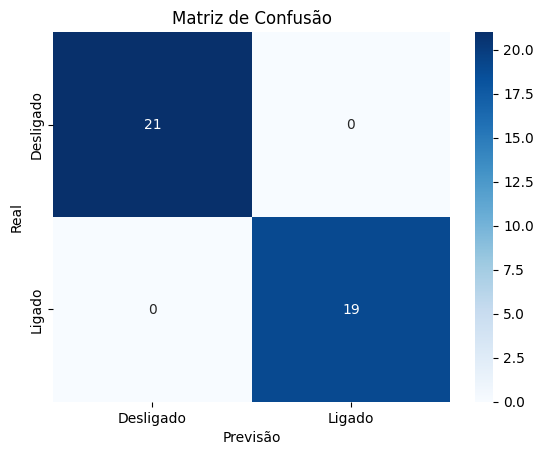

In [19]:
# Previsões e cálculo de métricas
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir métricas de avaliação
print("Métricas de Avaliação do Modelo:")
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Revocação: {recall:.2f}")

# Exibir a matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Desligado', 'Ligado'], yticklabels=['Desligado', 'Ligado'])
plt.xlabel("Previsão")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()